In [3]:
import pandas as pd 
import os
# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', 200)  # Adjust this number as needed
pd.set_option('display.max_columns', 50)  # Adjust this number as needed

In [4]:
df_name = 'attended_community'
df = pd.read_csv(f'../../data_CityEvent/processed/1.5.3_events_join_w_mobility/{df_name}_hourly_visits.csv')
df.head()

,EVENT_ID,BGFIPS,geometry,EVENT_START_BOSTON,EVENT_END_BOSTON,CATEGORY,Date,Visits_Mobility
0,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 06:00:00,12.0
1,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 07:00:00,25.0
2,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 08:00:00,36.0
3,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 09:00:00,56.0
4,BrGhonYexS6JirL4g4,60372073012,POINT (-118.2474094 34.052744),2022-08-27 06:00:00,2022-08-27 06:00:00,community,2022-08-27 06:00:00,12.0


In [4]:
df.shape

(144249, 8)

In [5]:
df_avg_visits = pd.read_csv(f'../../data_CityEvent/processed/1.5.4_avg_visits_across_day_of_week_at_cbgid_hour_of_day/avg_visits_{df_name}_hourly_visits.csv')
print(df_avg_visits.shape)

(11164, 6)


In [6]:
df_avg_visits[:2]

,DAY_OF_WEEK,START_HOUR,BGFIPS,TOTAL_VISITS,AVG_VISITS,EVENTS_COUNT
0,Friday,0,60014229002,7.0,2.333333,3
1,Friday,0,60330013003,0.0,0.000000,4


### Step 1: Create day_of_week, hour columns in raw table

In [7]:
import pandas as pd

# Assuming your dataframe is called df
df['Date'] = pd.to_datetime(df['Date'])  # Ensure the 'Date' column is in datetime format

# Extract day of the week and hour
df['day_of_week'] = df['Date'].dt.day_name()  # Get the day name (e.g., Monday, Tuesday)
df['hour'] = df['Date'].dt.hour  # Get the hour of the day

# Show the updated dataframe
display(df.head())


,EVENT_ID,BGFIPS,geometry,EVENT_START_BOSTON,EVENT_END_BOSTON,CATEGORY,Date,Visits_Mobility,day_of_week,hour
0,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 06:00:00,12.0,Saturday,6
1,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 07:00:00,25.0,Saturday,7
2,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 08:00:00,36.0,Saturday,8
3,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 09:00:00,56.0,Saturday,9
4,BrGhonYexS6JirL4g4,60372073012,POINT (-118.2474094 34.052744),2022-08-27 06:00:00,2022-08-27 06:00:00,community,2022-08-27 06:00:00,12.0,Saturday,6


### Step 2: Get average_visits

In [8]:
# Group by 'BGFIPS', 'day_of_week', and 'hour' and calculate the mean of 'Visits_Mobility'
df['avg_visits_weekly'] = df.groupby(['BGFIPS', 'day_of_week', 'hour'])['Visits_Mobility'].transform('mean')

# Show the updated dataframe
display(df.head())

,EVENT_ID,BGFIPS,geometry,EVENT_START_BOSTON,EVENT_END_BOSTON,CATEGORY,Date,Visits_Mobility,day_of_week,hour,avg_visits_weekly
0,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 06:00:00,12.0,Saturday,6,8.611111
1,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 07:00:00,25.0,Saturday,7,20.277778
2,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 08:00:00,36.0,Saturday,8,31.187500
3,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 09:00:00,56.0,Saturday,9,52.400000
4,BrGhonYexS6JirL4g4,60372073012,POINT (-118.2474094 34.052744),2022-08-27 06:00:00,2022-08-27 06:00:00,community,2022-08-27 06:00:00,12.0,Saturday,6,33.666667


### Step 3: Get num_events for a particular date and BGFIPS

In [14]:
# Group by 'Date' and 'BGFIPS', count unique 'EVENT_ID's, and merge the rows
df_num_events = df.groupby(['Date', 'BGFIPS'], as_index=False).agg(num_events=('EVENT_ID', 'nunique'))

# Merge the result with the original dataframe to get the new column in the original data
df = pd.merge(df, df_num_events, on=['Date', 'BGFIPS'], how='left')

# Show the updated dataframe
display(df.head())


,EVENT_ID,BGFIPS,geometry,EVENT_START_BOSTON,EVENT_END_BOSTON,CATEGORY,Date,Visits_Mobility,day_of_week,hour,avg_visits_weekly,num_events
0,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 06:00:00,12.0,Saturday,6,8.611111,1
1,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 07:00:00,25.0,Saturday,7,20.277778,1
2,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 08:00:00,36.0,Saturday,8,31.187500,1
3,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 09:00:00,56.0,Saturday,9,52.400000,1
4,BrGhonYexS6JirL4g4,60372073012,POINT (-118.2474094 34.052744),2022-08-27 06:00:00,2022-08-27 06:00:00,community,2022-08-27 06:00:00,12.0,Saturday,6,33.666667,1


In [15]:
df.num_events.value_counts()

num_events
1    132103
2     10292
3      1266
4       500
5        70
6        18
Name: count, dtype: int64

### Step 4: Calculate percentage_visit_change

In [16]:
df['percentage_visit_change'] = (df['Visits_Mobility'] - df['avg_visits_weekly'])/df['avg_visits_weekly']

In [18]:
df[:2]

,EVENT_ID,BGFIPS,geometry,EVENT_START_BOSTON,EVENT_END_BOSTON,CATEGORY,Date,Visits_Mobility,day_of_week,hour,avg_visits_weekly,num_events,percentage_visit_change
0,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 06:00:00,12.0,Saturday,6,8.611111,1,0.393548
1,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 07:00:00,25.0,Saturday,7,20.277778,1,0.232877


In [29]:
df['num_events'].value_counts().index

Index([1, 2, 3, 4, 5, 6], dtype='int64', name='num_events')

### Step 5: Create Box Plot

C:\Users\HP\AppData\Local\Temp\ipykernel_13460\3386605339.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


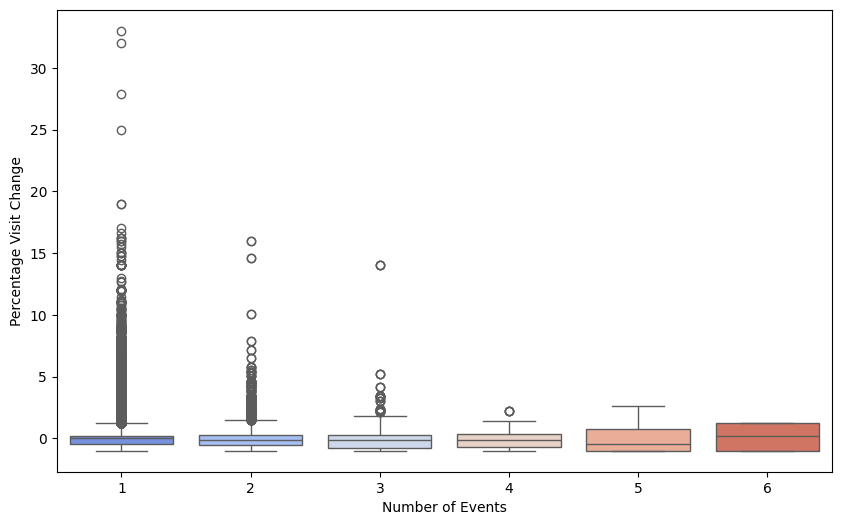

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create the plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')
plt.xlabel('Number of Events')
plt.ylabel('Percentage Visit Change')
plt.title(df_name)

# Save the plot
# plt.savefig('percentage_visit_change_by_events_class.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### Automate above

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def create_box_plot(df, df_name='event_category'):
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')
    plt.xlabel('Number of Events')
    plt.ylabel('Percentage Visit Change')
    plt.title(df_name)

    # Save the plot
    plt.savefig(f'../../results/2.3.1_box_plots/{df_name}.png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()


In [6]:
def data_processing(df, df_name=''):
    try:
        # Step 1: Get new columns- day of the week and hour
        df['Date'] = pd.to_datetime(df['Date'])  # Ensure the 'Date' column is in datetime format

        df['day_of_week'] = df['Date'].dt.day_name()  # Get the day name (e.g., Monday, Tuesday)
        df['hour'] = df['Date'].dt.hour  # Get the hour of the day


        # Step 2 Group by 'BGFIPS', 'day_of_week', and 'hour' and calculate the mean of 'Visits_Mobility'
        df['avg_visits_weekly'] = df.groupby(['BGFIPS', 'day_of_week', 'hour'])['Visits_Mobility'].transform('mean')

        # Step 3: Group by 'Date' and 'BGFIPS', count unique 'EVENT_ID's, and merge the rows
        df_num_events = df.groupby(['Date', 'BGFIPS'], as_index=False).agg(num_events=('EVENT_ID', 'nunique'))

        # Merge the result with the original dataframe to get the new column in the original data
        df = pd.merge(df, df_num_events, on=['Date', 'BGFIPS'], how='left')

        # Step 4: Calculate percentage visit change
        df['percentage_visit_change'] = (df['Visits_Mobility'] - df['avg_visits_weekly'])/df['avg_visits_weekly']

        # Step 5: Save dataset
        df.to_csv(f'../../data_CityEvent/processed/2.3.1_processed/{df_name}.csv', index=False)

        # Step 5: Show Box Plot
        create_box_plot(df, df_name)
        
    except Exception as e:
        print(f"An error occurred during processing: {e}")
            
    # Optionally return the modified dataframe for further use
    return df


In [49]:
def data_processing(df, df_name=''):

    # Step 1: Get new columns- day of the week and hour
    df['Date'] = pd.to_datetime(df['Date'])  # Ensure the 'Date' column is in datetime format

    df['day_of_week'] = df['Date'].dt.day_name()  # Get the day name (e.g., Monday, Tuesday)
    df['hour'] = df['Date'].dt.hour  # Get the hour of the day


    # Step 2 Group by 'BGFIPS', 'day_of_week', and 'hour' and calculate the mean of 'Visits_Mobility'
    df['avg_visits_weekly'] = df.groupby(['BGFIPS', 'day_of_week', 'hour'])['Visits_Mobility'].transform('mean')

    # Step 3: Group by 'Date' and 'BGFIPS', count unique 'EVENT_ID's, and merge the rows
    df_num_events = df.groupby(['Date', 'BGFIPS'], as_index=False).agg(num_events=('EVENT_ID', 'nunique'))

    # Merge the result with the original dataframe to get the new column in the original data
    df = pd.merge(df, df_num_events, on=['Date', 'BGFIPS'], how='left')

    # Step 4: Calculate percentage visit change
    df['percentage_visit_change'] = (df['Visits_Mobility'] - df['avg_visits_weekly'])/df['avg_visits_weekly']

    # Step 5: Save dataset
    df.to_csv(f'../../data_CityEvent/processed/2.3.1_processed/{df_name}.csv', index=False)

    # Step 5: Show Box Plot
    create_box_plot(df, df_name)


In [8]:
import os
# LOOP
filepath = '../../data_CityEvent/processed/1.5.3_events_join_w_mobility/'
filenames = os.listdir(filepath)
print(filenames)

['attended_community_hourly_visits.csv', 'attended_concerts_hourly_visits.csv', 'attended_conferences_hourly_visits.csv', 'attended_expos_hourly_visits.csv', 'attended_festivals_hourly_visits.csv', 'attended_performing-arts_hourly_visits.csv', 'attended_sports_hourly_visits.csv', 'non_attended_academic_hourly_visits.csv', 'non_attended_daylight-savings_hourly_visits.csv', 'non_attended_observances_hourly_visits.csv', 'non_attended_politics_hourly_visits.csv', 'non_attended_public-holidays_hourly_visits.csv', 'non_attended_school-holidays_hourly_visits.csv', 'unscheduled_airport-delays_hourly_visits.csv', 'unscheduled_disasters_hourly_visits.csv', 'unscheduled_health-warnings_hourly_visits.csv', 'unscheduled_severe-weather_hourly_visits.csv', 'unscheduled_terror_hourly_visits.csv']


C:\Users\HP\AppData\Local\Temp\ipykernel_14760\3617572077.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


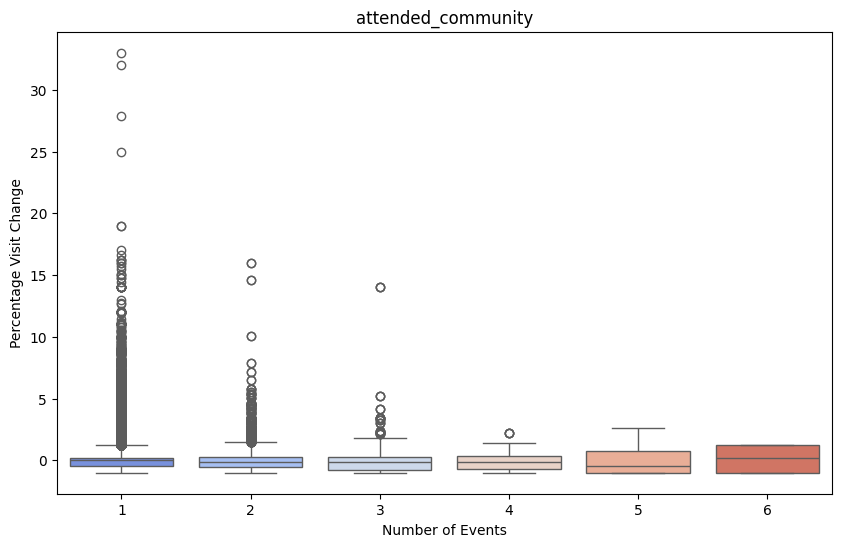

C:\Users\HP\AppData\Local\Temp\ipykernel_14760\3617572077.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


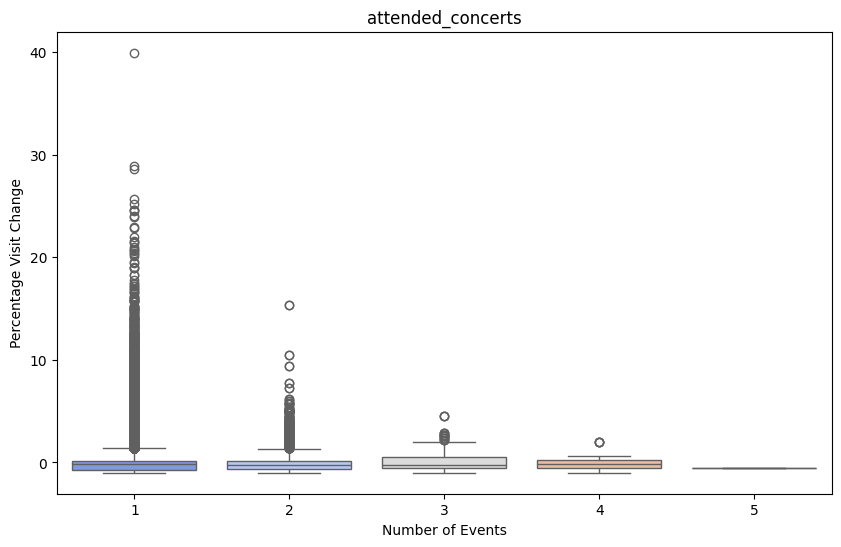

C:\Users\HP\AppData\Local\Temp\ipykernel_14760\3617572077.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


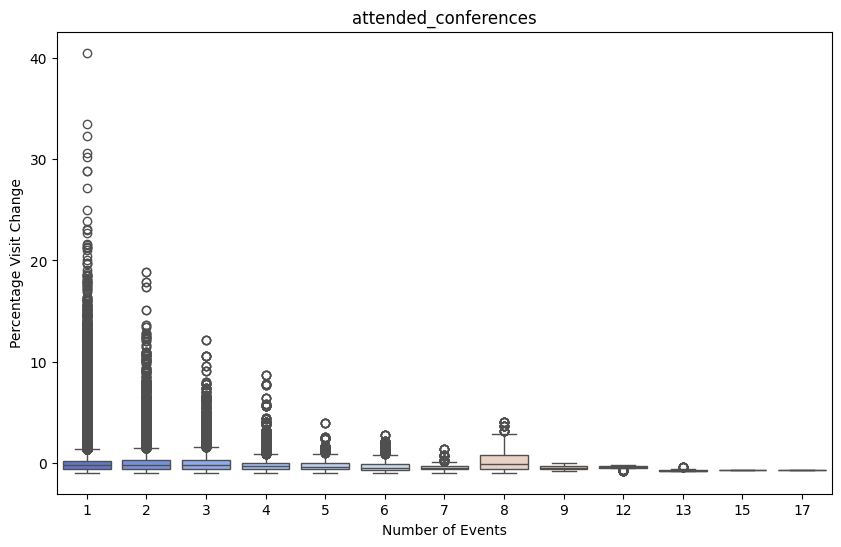

C:\Users\HP\AppData\Local\Temp\ipykernel_14760\3617572077.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


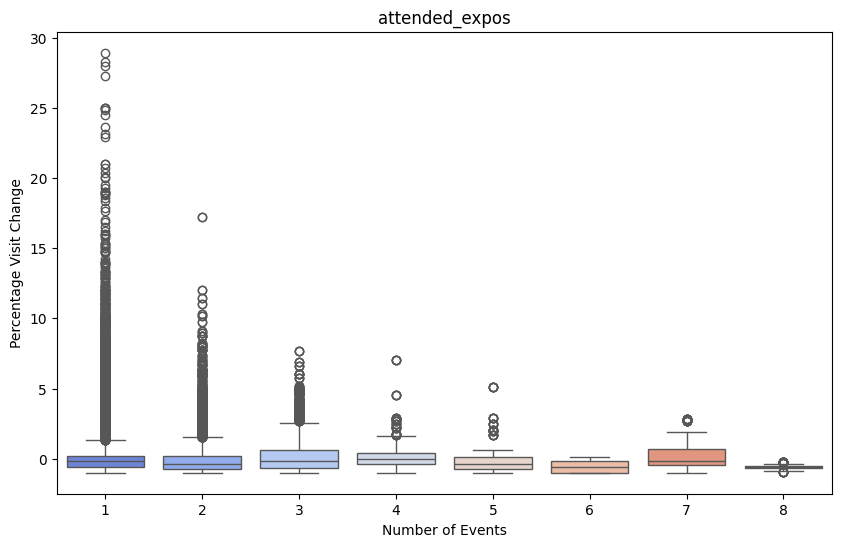

C:\Users\HP\AppData\Local\Temp\ipykernel_14760\3617572077.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


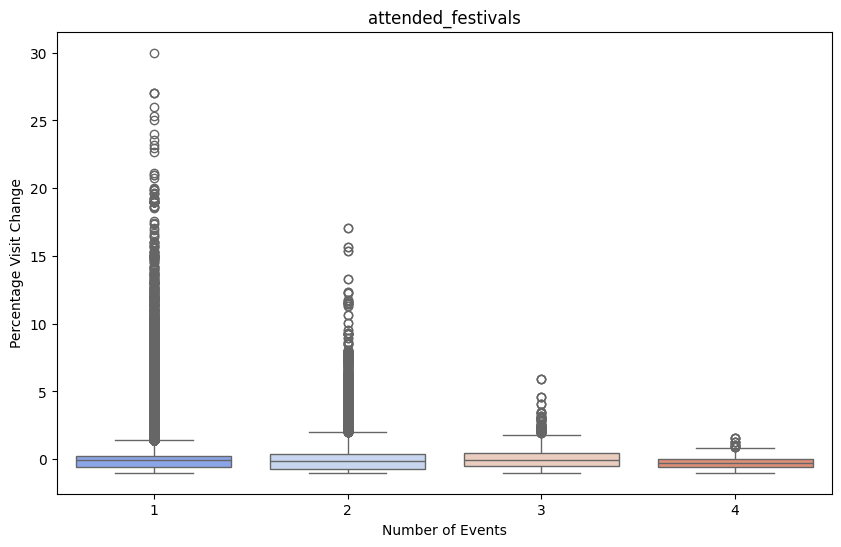

C:\Users\HP\AppData\Local\Temp\ipykernel_14760\3617572077.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


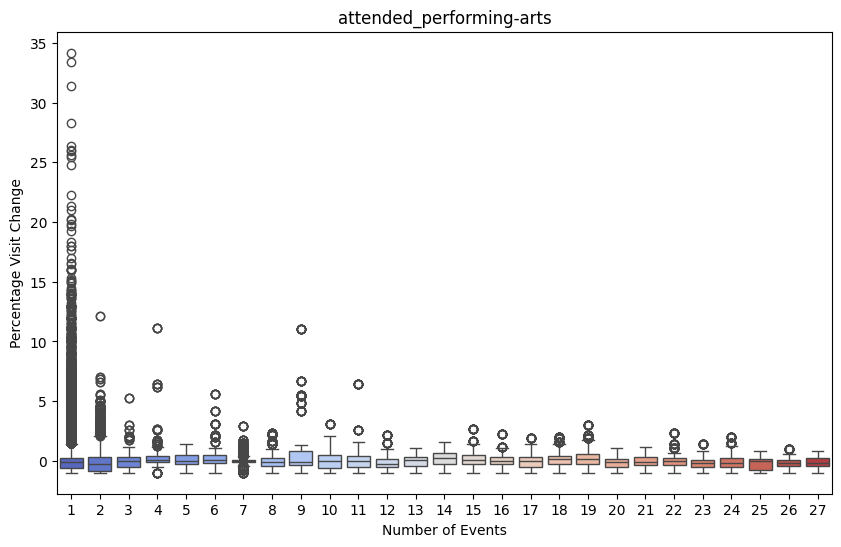

C:\Users\HP\AppData\Local\Temp\ipykernel_14760\3617572077.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


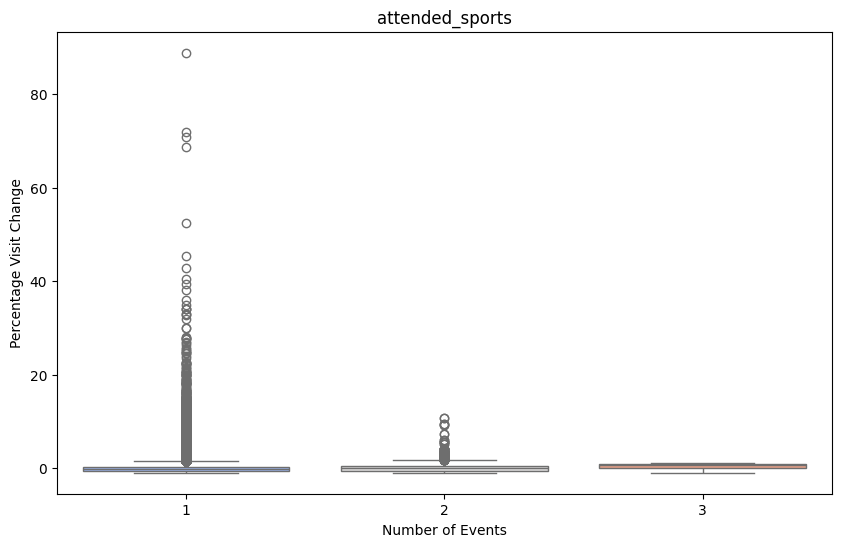

C:\Users\HP\AppData\Local\Temp\ipykernel_14760\3617572077.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


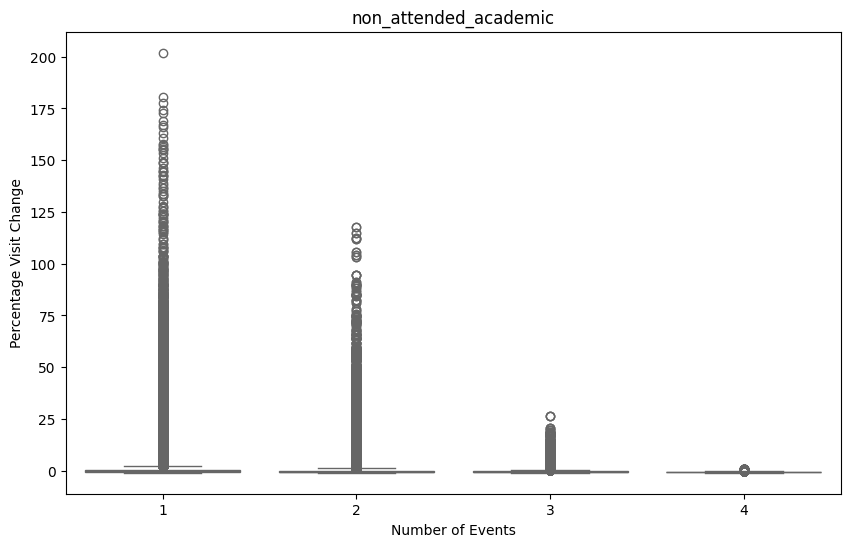

C:\Users\HP\AppData\Local\Temp\ipykernel_14760\3617572077.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


An error occurred during processing: local variable 'boxprops' referenced before assignment


C:\Users\HP\AppData\Local\Temp\ipykernel_14760\3617572077.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


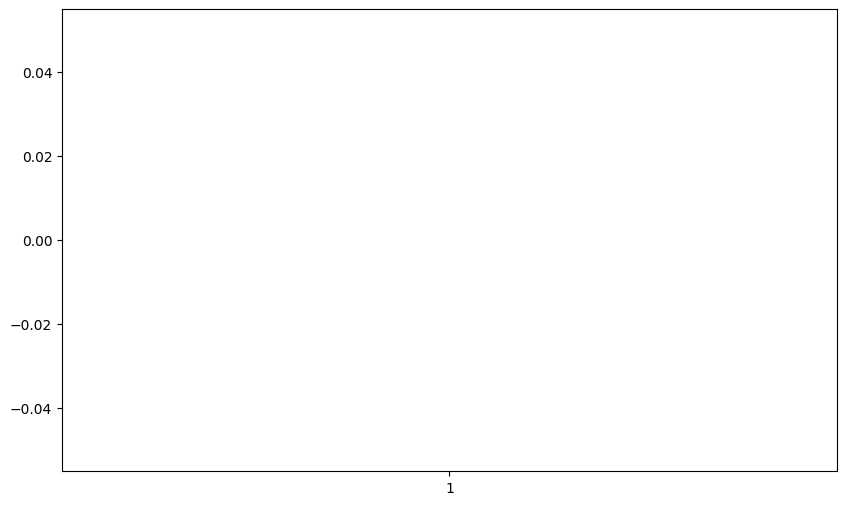

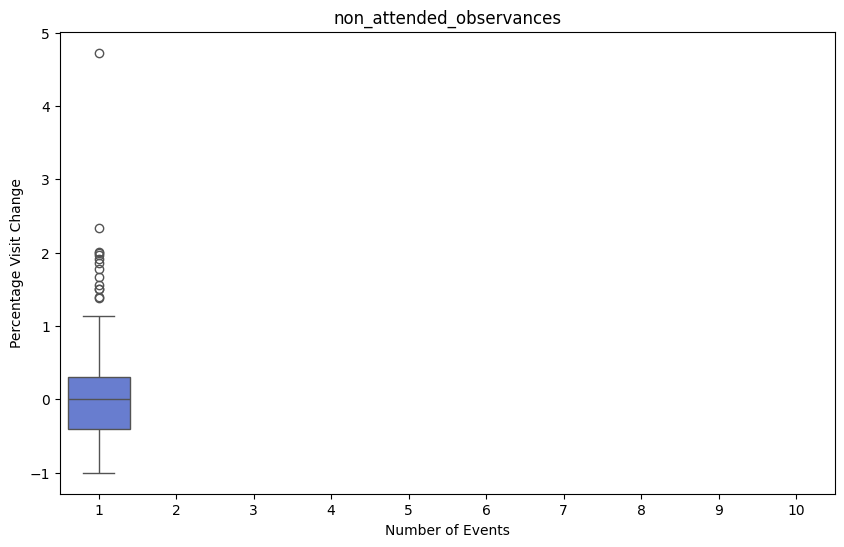

C:\Users\HP\AppData\Local\Temp\ipykernel_14760\3617572077.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')
C:\Users\HP\AppData\Local\Temp\ipykernel_14760\3617572077.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


An error occurred during processing: local variable 'boxprops' referenced before assignment


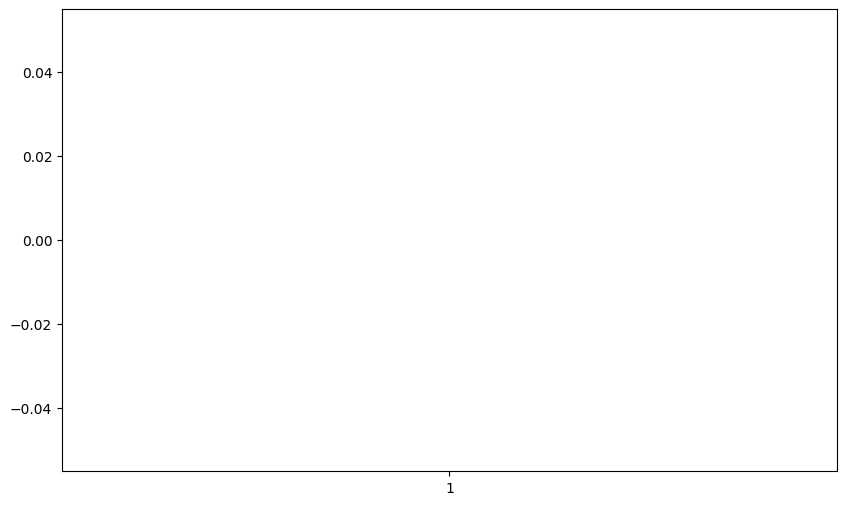

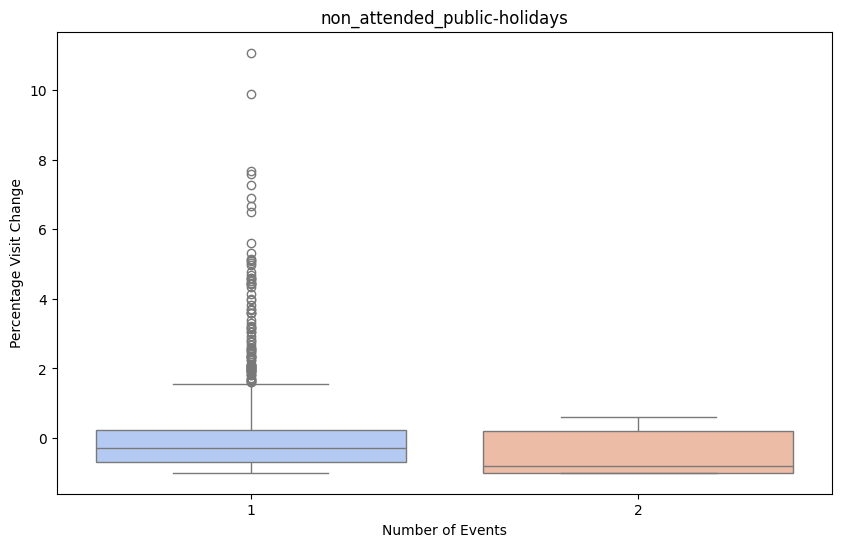

C:\Users\HP\AppData\Local\Temp\ipykernel_14760\3617572077.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


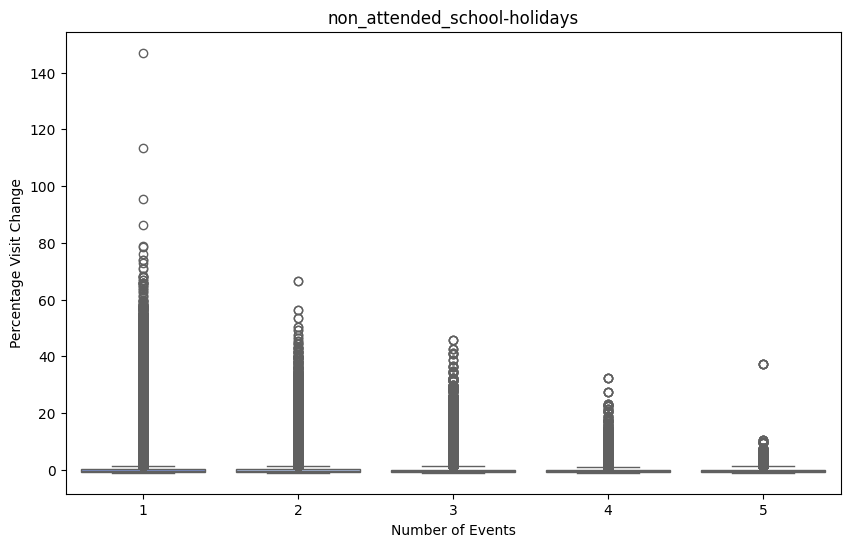

C:\Users\HP\AppData\Local\Temp\ipykernel_14760\3617572077.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


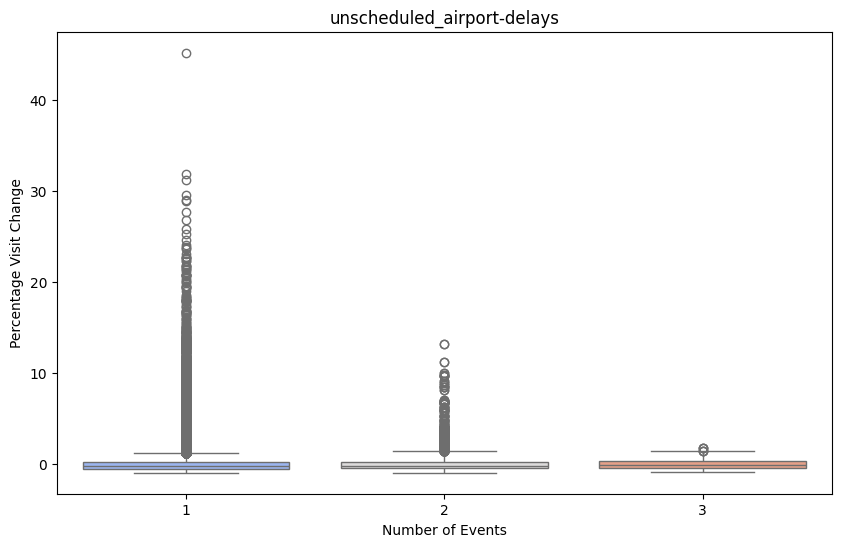

C:\Users\HP\AppData\Local\Temp\ipykernel_14760\3617572077.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


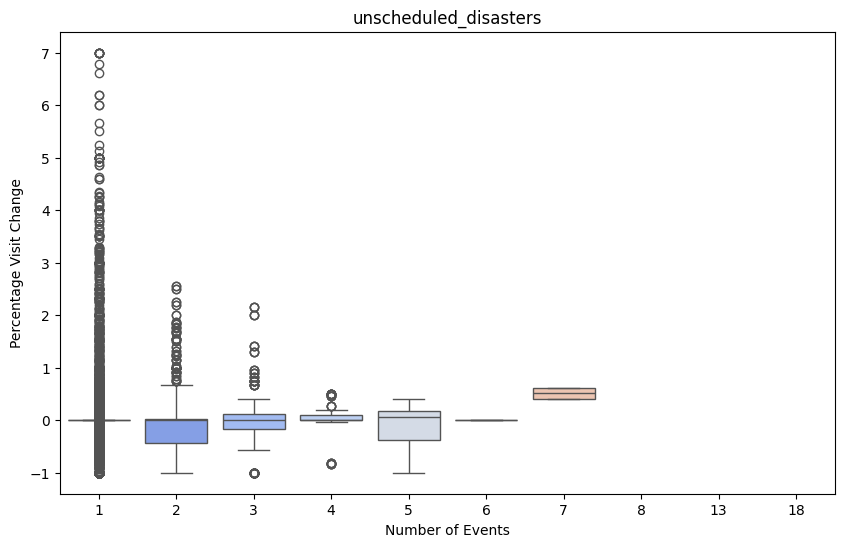

C:\Users\HP\AppData\Local\Temp\ipykernel_14760\3617572077.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


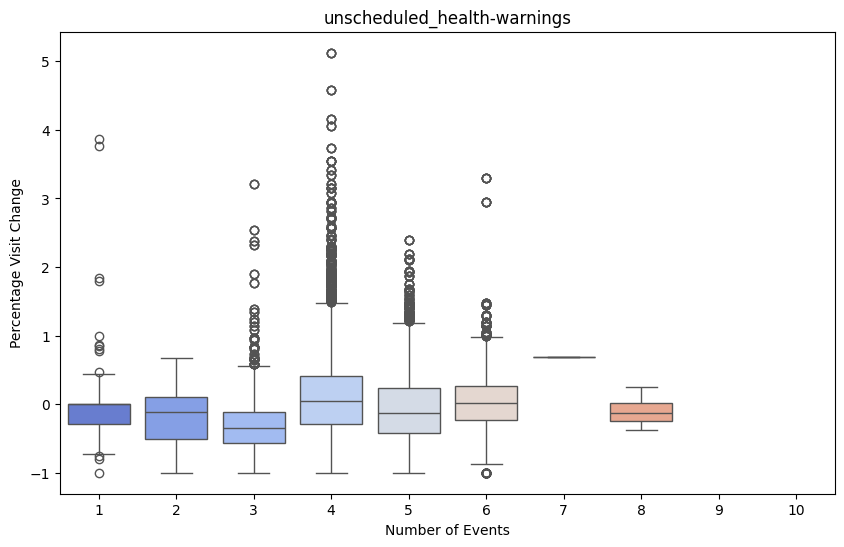

C:\Users\HP\AppData\Local\Temp\ipykernel_14760\3617572077.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


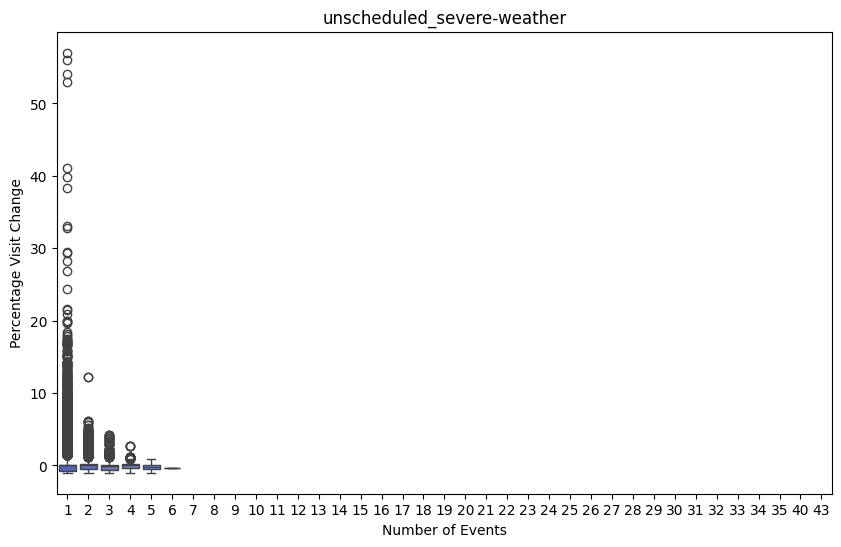

C:\Users\HP\AppData\Local\Temp\ipykernel_14760\3617572077.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


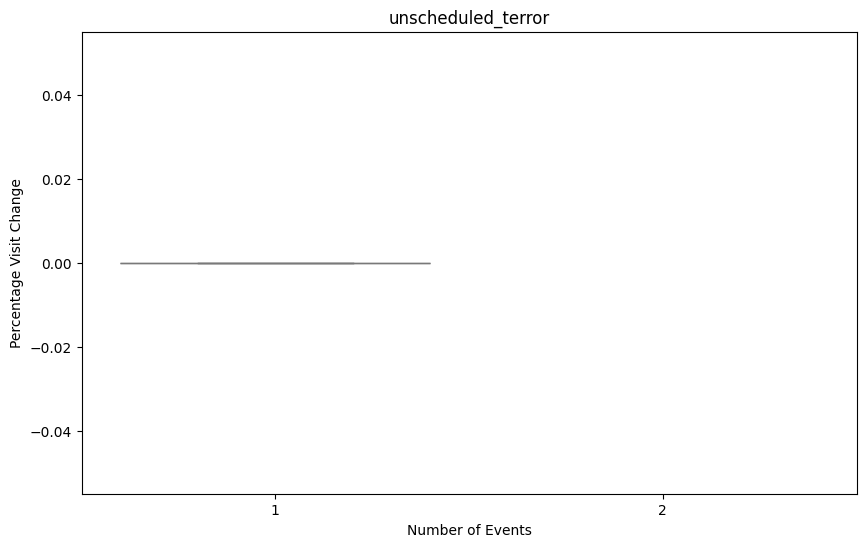

In [9]:
for filename in filenames:
    
    df_name = filename[:-18]
    df = pd.read_csv(f'{filepath}/{df_name}_hourly_visits.csv')
    # print(df.shape)

    data_processing(df, df_name)